In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('insurance.csv')

In [4]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
print(df.shape)
print(df.size)
print(df.info())

(1338, 7)
9366
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [8]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df_lo=df[df['charges']<=4740.287150]
df_hi=df[df['charges']>=16639.912515]

In [13]:
print('shape of df_lo:', df_lo.shape)
print('shape of df_hi:', df_hi.shape)

shape of df_lo: (335, 7)
shape of df_hi: (335, 7)


In [14]:
df_lo.describe()

,age,bmi,children,charges
count,335.000000,335.000000,335.000000,335.000000
mean,23.811940,29.908687,0.623881,2853.089441
std,4.830403,6.242373,0.929569,1050.225575
min,18.000000,15.960000,0.000000,1121.873900
25%,19.000000,25.647500,0.000000,1965.901350
50%,23.000000,29.735000,0.000000,2710.828550
75%,28.000000,33.867500,1.000000,3764.087900
max,37.000000,53.130000,5.000000,4738.268200


In [15]:
df_hi.describe()

,age,bmi,children,charges
count,335.000000,335.000000,335.000000,335.000000
mean,40.188060,31.308582,1.179104,31108.444687
std,13.817583,5.843001,1.164924,10595.023690
min,18.000000,17.765000,0.000000,16657.717450
25%,28.000000,27.100000,0.000000,21302.112325
50%,42.000000,30.900000,1.000000,28923.136920
75%,52.000000,35.530000,2.000000,39726.566025
max,64.000000,52.580000,5.000000,63770.428010


## age vs charges

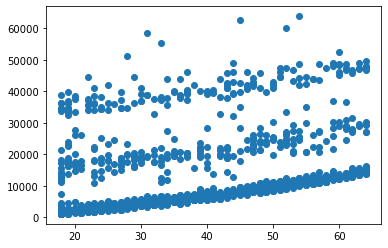

In [18]:
plt.scatter(df['age'], df['charges'])

## age vs low charges

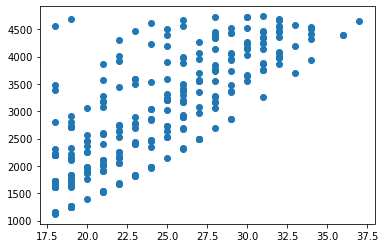

In [20]:
plt.scatter(df_lo['age'], df_lo['charges'])

## age vs high charges

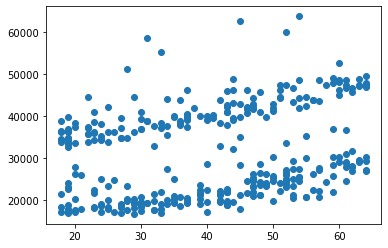

In [22]:
plt.scatter(df_hi['age'], df_hi['charges'])

In [25]:
#pd.get_dummies(df[['sex', 'smoker']])

In [37]:
print(df.groupby('sex')['charges'].mean())
print('% of sex: \n',df.groupby('sex')['charges'].count()/df.shape[0])
print(df.groupby('smoker')['charges'].mean())
print('% of smokers: \n',df.groupby('smoker')['charges'].mean()/df.shape[0])

sex
female    12569.578844
male      13956.751178
Name: charges, dtype: float64
% of sex: 
 sex
female    0.494768
male      0.505232
Name: charges, dtype: float64
smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64
% of smokers: 
 smoker
no      6.303638
yes    23.953835
Name: charges, dtype: float64


Not much difference between male and female average charge but huge impact between smoker vs non smoker

In [38]:
df.pivot_table(index='sex', columns='smoker', values='charges')

smoker,no,yes
sex,,
female,8762.297300,30678.996276
male,8087.204731,33042.005975
